In [149]:
import warnings
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [150]:
df = pd.read_csv("train.csv")

In [151]:
df.shape

(1460, 81)

In [152]:
pd.set_option("display.max_columns",None)

In [153]:
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## drop id column

In [154]:
df.drop(["Id"],axis=1,inplace=True)

## Check for null values

In [155]:
null_sum=df.isnull().sum()
null_ratio=df.isnull().sum()/df.shape[0]
pd.DataFrame([null_sum,null_ratio],index=["Null_sum","null_ratio"])

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Null_sum,0.0,0.0,259.000000,0.0,0.0,1369.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.000000,8.000000,0.0,0.0,0.0,37.000000,37.000000,38.000000,37.000000,0.0,38.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,690.000000,81.000000,81.000000,81.000000,0.0,0.0,81.000000,81.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1453.000000,1179.000000,1406.000000,0.0,0.0,0.0,0.0,0.0,0.0
null_ratio,0.0,0.0,0.177397,0.0,0.0,0.937671,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005479,0.005479,0.0,0.0,0.0,0.025342,0.025342,0.026027,0.025342,0.0,0.026027,0.0,0.0,0.0,0.0,0.0,0.0,0.000685,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.472603,0.055479,0.055479,0.055479,0.0,0.0,0.055479,0.055479,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.995205,0.807534,0.963014,0.0,0.0,0.0,0.0,0.0,0.0


## Check for unique value

In [156]:
pd.DataFrame([df.nunique(),df.dtypes],index=["num_unique","dtypes"])

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
num_unique,15,5,110,1073,2,2,4,4,2,5,3,25,9,8,5,8,10,9,112,61,6,8,15,16,4,327,4,5,6,4,4,4,6,637,6,144,780,721,6,5,2,5,753,417,24,861,4,3,4,3,8,4,4,12,7,4,5,6,97,3,5,441,5,5,3,274,202,120,20,76,8,3,4,4,21,12,5,9,6,663
dtypes,int64,object,float64,int64,object,object,object,object,object,object,object,object,object,object,object,object,int64,int64,int64,int64,object,object,object,object,object,float64,object,object,object,object,object,object,object,int64,object,int64,int64,int64,object,object,object,object,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,object,int64,object,int64,object,object,float64,object,int64,int64,object,object,object,int64,int64,int64,int64,int64,int64,object,object,object,int64,int64,int64,object,object,int64


## Remove some columns because that is  have a large null values

In [157]:
df.drop(["Alley","MiscFeature","PoolQC","Fence"],axis=1,inplace=True)

<function matplotlib.pyplot.show(close=None, block=None)>

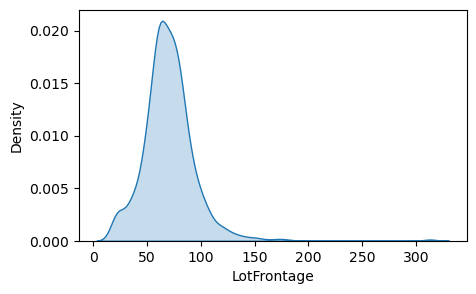

In [158]:
plt.figure(figsize=(5,3))
sns.kdeplot(df["LotFrontage"],fill=True)
plt.show


In [159]:
mean=df["LotFrontage"].mean()
df["LotFrontage"].fillna(mean,inplace=True)

<function matplotlib.pyplot.show(close=None, block=None)>

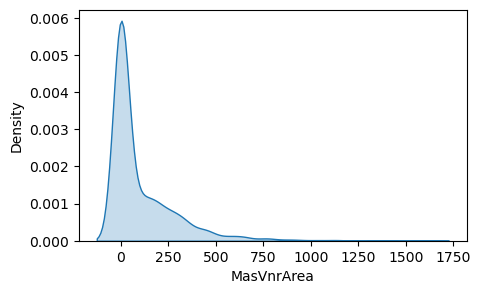

In [160]:
plt.figure(figsize=(5,3))
sns.kdeplot(df["MasVnrArea"],fill=True)
plt.show


In [161]:
median=df["MasVnrArea"].median()
df["MasVnrArea"].fillna(median,inplace=True)

<function matplotlib.pyplot.show(close=None, block=None)>

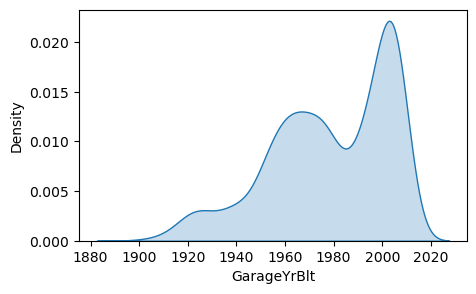

In [162]:
plt.figure(figsize=(5,3))
sns.kdeplot(df["GarageYrBlt"],fill=True)
plt.show


In [163]:
median=df["GarageYrBlt"].median()
df["GarageYrBlt"].fillna(median,inplace=True)

In [164]:
cat_cols=["MasVnrType","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","Electrical","FireplaceQu","GarageType","GarageFinish","GarageQual","GarageCond",]
for column in cat_cols:
    mode=df[column].mode()[0]
    df[column].fillna(mode,inplace=True)

## Check for null values after handells

In [165]:
null_sum=df.isnull().sum()
null_ratio=df.isnull().sum()/df.shape[0]
pd.DataFrame([null_sum,null_ratio],index=["Null_sum","null_ratio"])

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Null_sum,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
null_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Reprsent some columns as categorical 

In [166]:
col="MSZoning Street LotShape LandContour Utilities 3SsnPorch LowQualFinSF LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle OverallQual OverallCond RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC CentralAir Electrical BsmtFullBath BsmtHalfBath FullBath HalfBath BedroomAbvGr KitchenAbvGr KitchenQual TotRmsAbvGrd Functional Fireplaces FireplaceQu GarageType GarageFinish GarageCars GarageQual GarageCond PavedDrive PoolArea MoSold SaleType SaleCondition".split()
df[col]=df[col].astype("category")
#df.info()

In [167]:
pd.DataFrame([df.nunique(),df.dtypes],index=["num_unique","dtypes"])

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
num_unique,15,5,111,1073,2,4,4,2,5,3,25,9,8,5,8,10,9,112,61,6,8,15,16,4,327,4,5,6,4,4,4,6,637,6,144,780,721,6,5,2,5,753,417,24,861,4,3,4,3,8,4,4,12,7,4,5,6,97,3,5,441,5,5,3,274,202,120,20,76,8,21,12,5,9,6,663
dtypes,int64,category,float64,int64,category,category,category,category,category,category,category,category,category,category,category,category,category,int64,int64,category,category,category,category,category,float64,category,category,category,category,category,category,category,int64,category,int64,int64,int64,category,category,category,category,int64,int64,category,int64,category,category,category,category,category,category,category,category,category,category,category,category,float64,category,category,int64,category,category,category,int64,int64,int64,category,int64,category,int64,category,int64,category,category,int64


## Check for duplicated

In [168]:
df.duplicated().sum()

0

## Statistics about data

In [169]:
df.describe()

,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MiscVal,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,1515.463699,1978.589041,472.980137,94.244521,46.660274,21.954110,15.060959,43.489041,2007.815753,180921.195890
std,42.300571,22.024023,9981.264932,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,525.480383,23.997022,213.804841,125.338794,66.256028,61.119149,55.757415,496.123024,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7553.500000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,1129.500000,1962.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,2007.000000,129975.000000
50%,50.000000,70.049958,9478.500000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,1464.000000,1980.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11601.500000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,1776.750000,2001.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,5642.000000,2010.000000,1418.000000,857.000000,547.000000,552.000000,480.000000,15500.000000,2010.000000,755000.000000


In [170]:
df.describe(include="category")

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,3SsnPorch,PoolArea,MoSold,SaleType,SaleCondition
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460
unique,5,2,4,4,2,5,3,25,9,8,5,8,10,9,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,24,4,3,4,3,8,4,4,12,7,4,5,6,3,5,5,5,3,20,8,12,9,6
top,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,0,0,0,2,0,3,1,TA,6,Typ,0,Gd,Attchd,Unf,2,TA,TA,Y,0,0,6,WD,Normal
freq,1151,1454,925,1311,1459,1052,1382,225,1260,1445,1220,726,397,821,1141,1434,515,504,872,906,1282,647,686,1348,991,467,1294,1428,741,1365,1335,1434,856,1378,768,913,804,1392,735,402,1360,690,1070,951,686,824,1392,1407,1340,1436,1453,253,1267,1198


## Visualization

In [171]:
numeric_df=df.select_dtypes("number").columns.tolist()
# numeric_df

In [172]:
categorical_df=df.select_dtypes("category").columns.tolist()
# categorical_df

In [173]:
print(len(numeric_df))
print(len(categorical_df))

22
54


<function matplotlib.pyplot.show(close=None, block=None)>

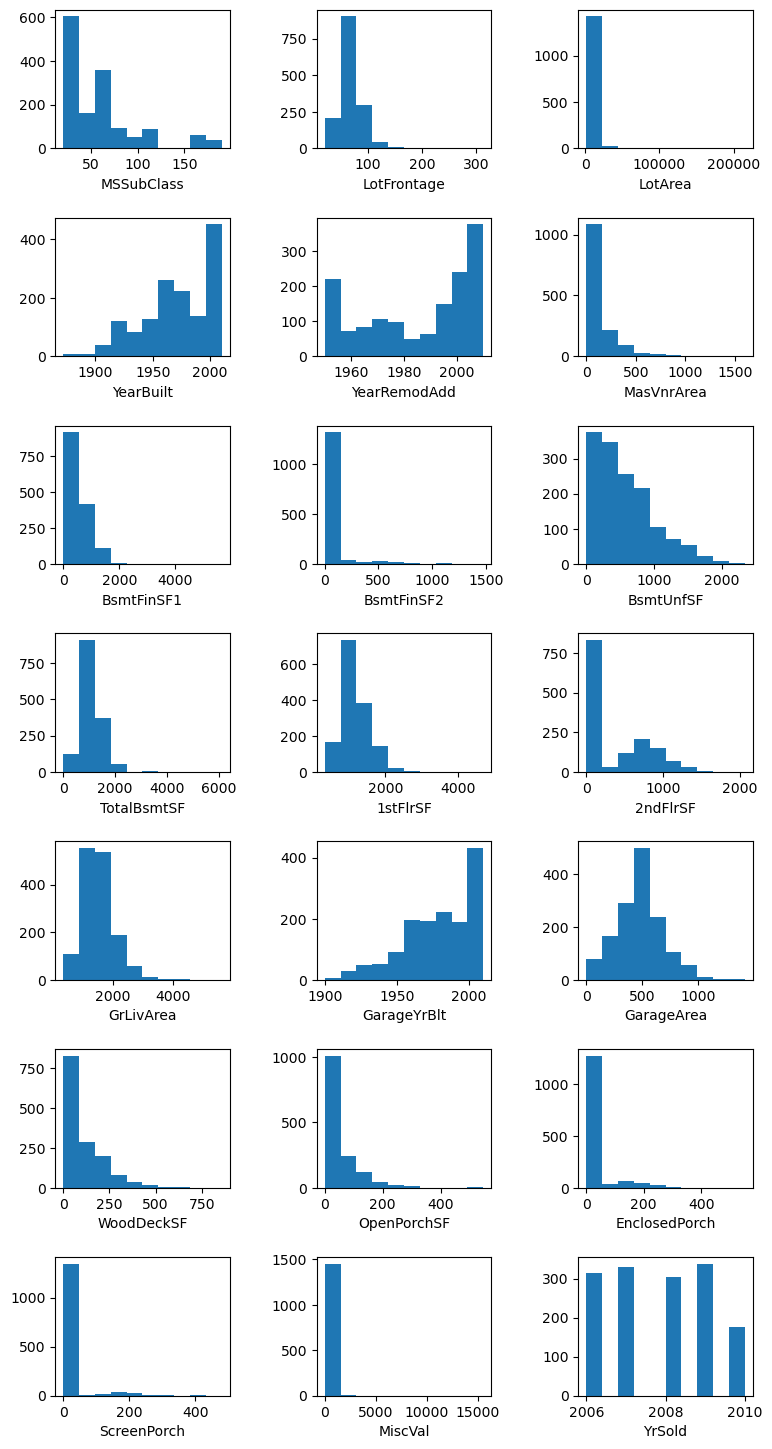

In [174]:
plt.figure(figsize=(9,18))
for i,col in enumerate (numeric_df[:-1]):
    plt.subplot(7,3,i+1)
    plt.hist(df[col])
    plt.xlabel(col)
plt.subplots_adjust(wspace=.5,hspace=.5)
plt.show

In [175]:
cols_with_low_var1="MiscVal ScreenPorch EnclosedPorch BsmtFinSF2 LotArea".split()

<function matplotlib.pyplot.show(close=None, block=None)>

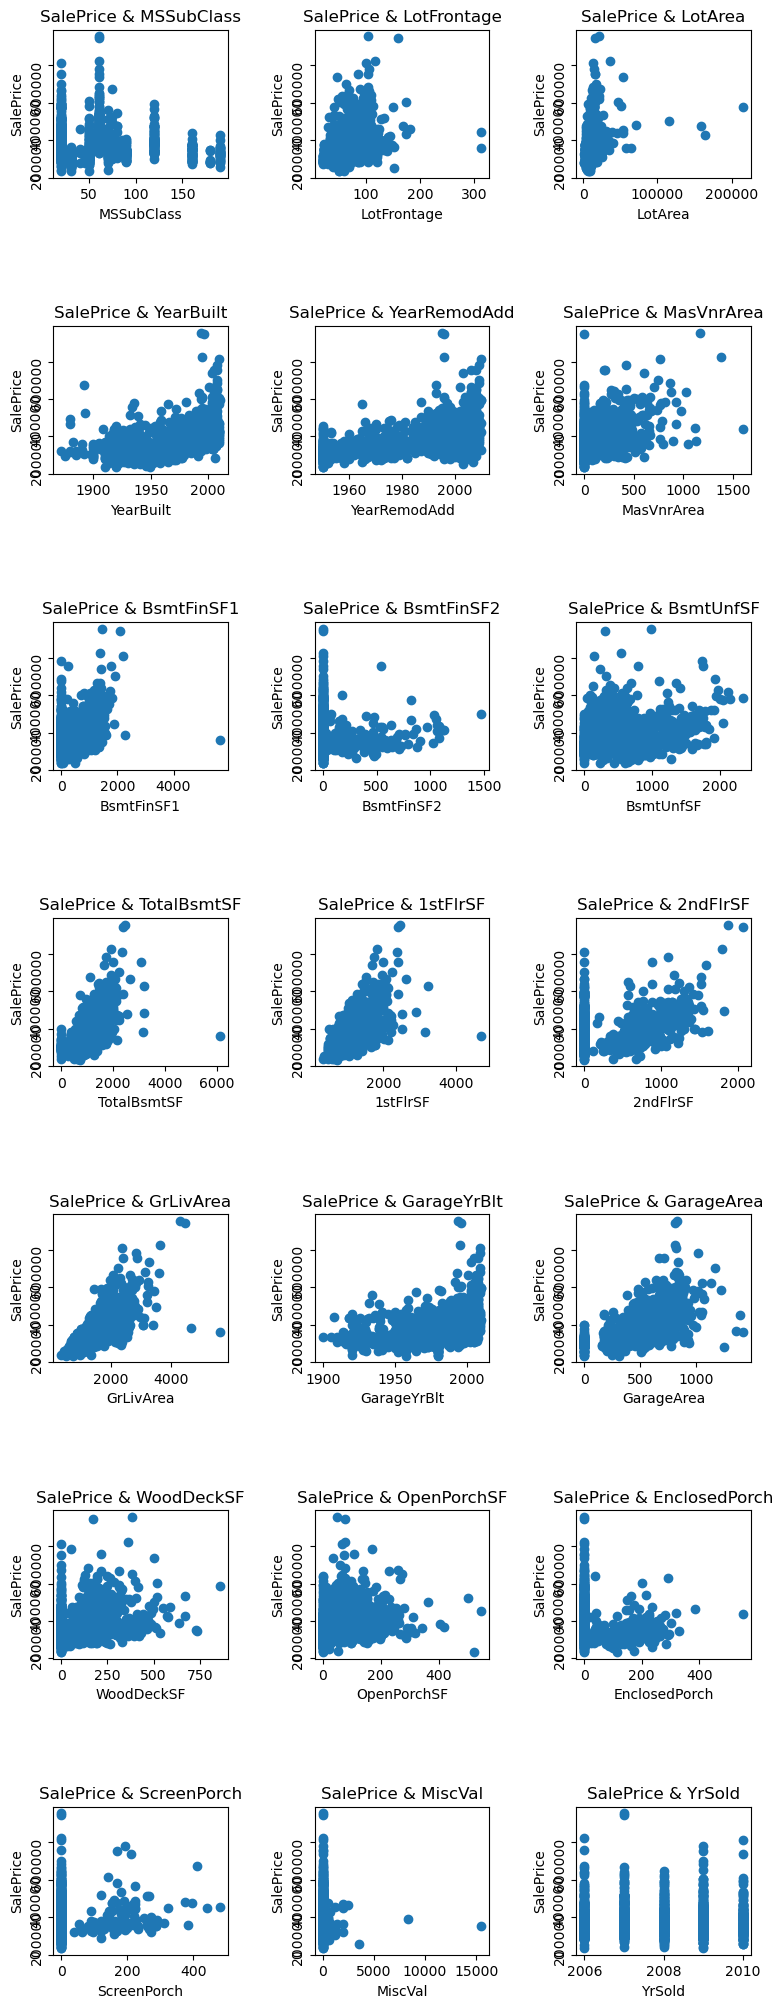

In [176]:
plt.figure(figsize=(9,25))
for i,col in enumerate(numeric_df[:-1]):
    plt.subplot(7,3,i+1)
    plt.scatter(df[col],df["SalePrice"])
    plt.ylabel("SalePrice")
    plt.xlabel(col)
    plt.title(f"SalePrice & {col}")
    plt.yticks(rotation=90)
plt.subplots_adjust(wspace=.5,hspace=1)
plt.show

## Check for outliers

<function matplotlib.pyplot.show(close=None, block=None)>

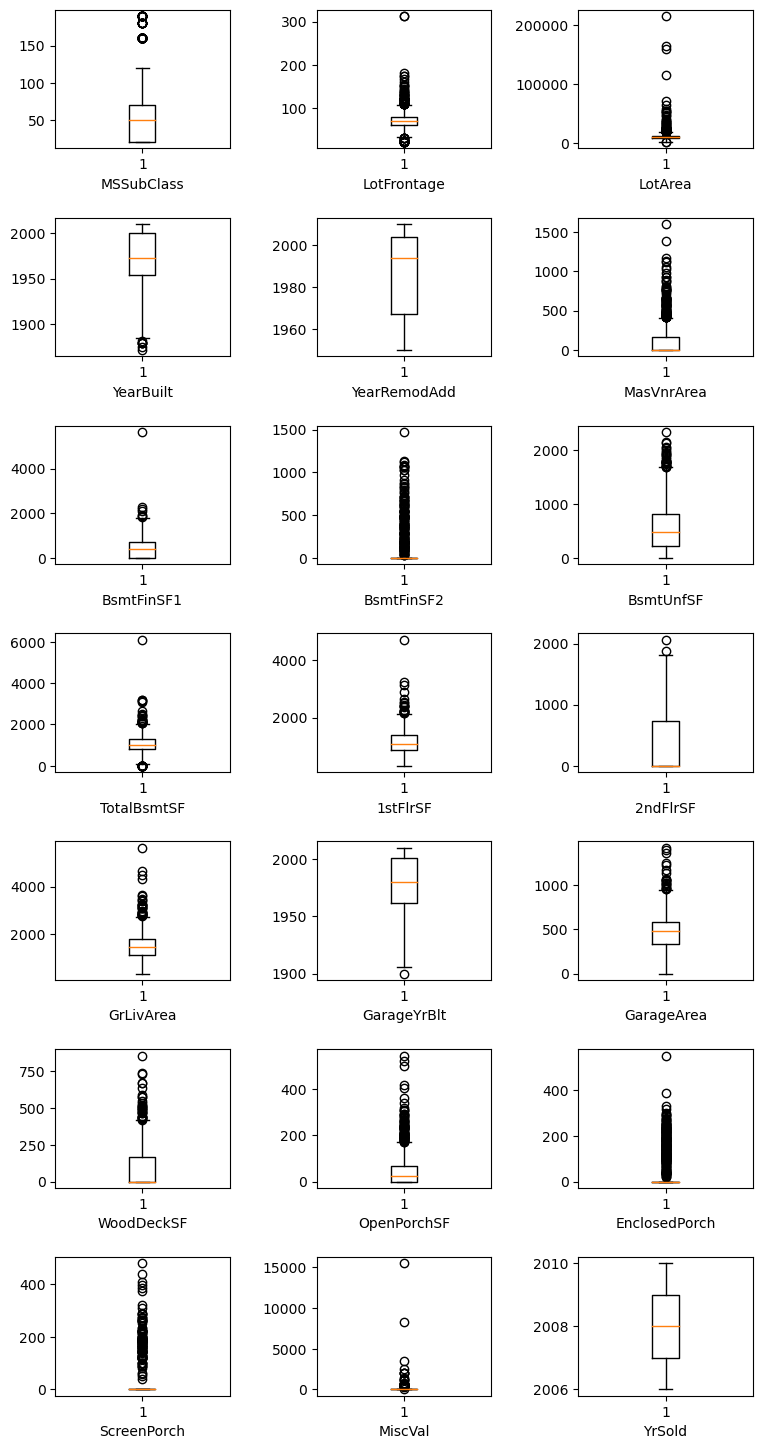

In [177]:
plt.figure(figsize=(9,18))
for i,col in enumerate (numeric_df[:-1]):
    plt.subplot(7,3,i+1)
    plt.boxplot(df[col])
    plt.xlabel(col)
plt.subplots_adjust(wspace=.5,hspace=.5)
plt.show
    

#### Check for normal distribution

<function matplotlib.pyplot.show(close=None, block=None)>

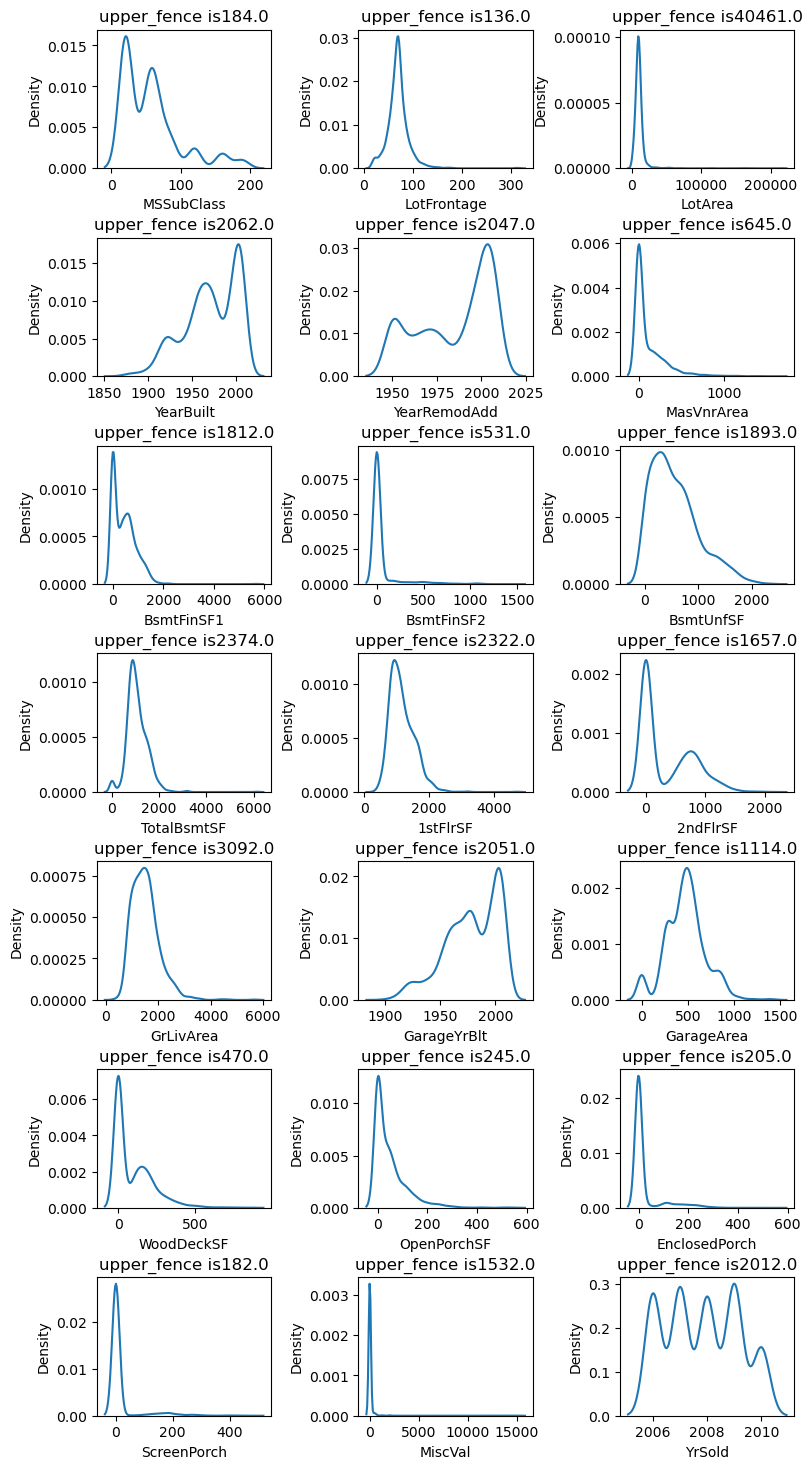

In [178]:
plt.figure(figsize=(9,18))
for i,col in enumerate(numeric_df[:-1]):
    plt.subplot(7,3,i+1)
    sns.kdeplot(df[col])
    m=df[col].mean()
    s=df[col].std()
    upper_fence=m+3*s
    lower_fence=m-3*s
    plt.title(f"upper_fence is{np.round(upper_fence)}")
plt.subplots_adjust(wspace=.5,hspace=.5)
plt.show

## Replace outliers

In [179]:
for col in numeric_df:
    Q3=df[col].quantile(.75)
    Q1=df[col].quantile(.25)
    IQR=Q3-Q1
    
    upper_fence=Q3+1.5*IQR
    lower_fence=Q1*1.5*IQR
    
    upper_out=df[df[col]>upper_fence][col].values
    df[col].replace(upper_out,upper_fence,inplace=True)
    
    lower_out=df[df[col]<lower_fence][col].values
    df[col].replace(lower_out,lower_fence,inplace=True)
    
    
#     print(f"Upper fence of {col} is: {upper_fence}")
#     print(df[col].max())    
#     print(f"lower fence of {col} is: {lower_fence}")
#     print(".................")


## Check for outliers after Replace

<function matplotlib.pyplot.show(close=None, block=None)>

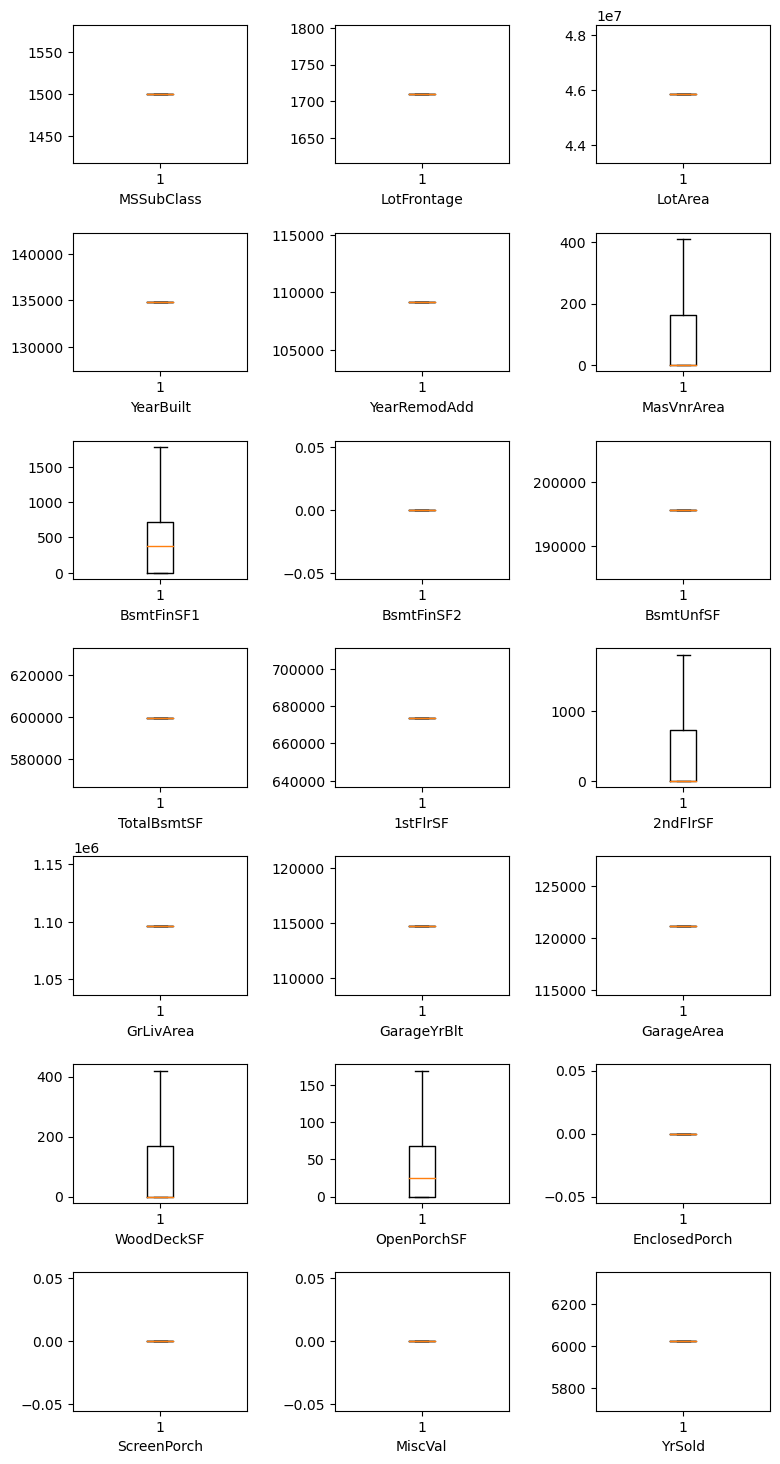

In [180]:
plt.figure(figsize=(9,18))
for i,col in enumerate (numeric_df[:-1]):
    plt.subplot(7,3,i+1)
    plt.boxplot(df[col])
    plt.xlabel(col)
plt.subplots_adjust(wspace=.5,hspace=.5)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

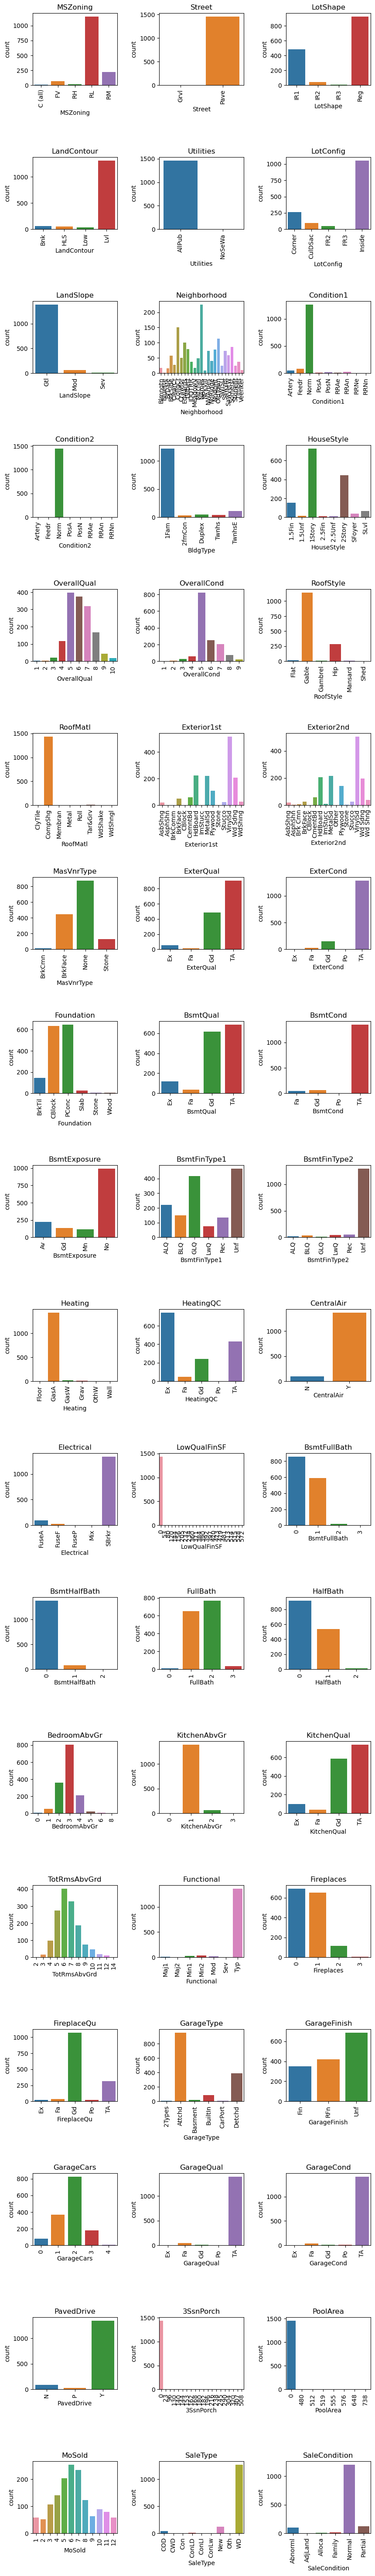

In [181]:
plt.figure(figsize=(10,75))
for i,col in enumerate (categorical_df):
    plt.subplot(18,3,i+1)
    sns.countplot(x=col, data=df)
    plt.title(col)
    plt.xticks(rotation=90)
plt.subplots_adjust(wspace=.5,hspace=1)
plt.show

In [182]:
cols_with_low_var2="Street Utilities PoolArea LandSlope 3SsnPorch GarageCond GarageQual BsmtHalfBath LowQualFinSF KitchenAbvGr Condition2 Electrical RoofMatl BsmtCond Heating CentralAir".split()

In [183]:
# plt.figure(figsize=(10,75))
# for i,col in enumerate (categorical_df):
#     plt.subplot(18,3,i+1)
#     sns.barplot(x=df[col],y=df["SalePrice"])
#     plt.xlabel(col)
#     plt.xticks(rotation=45)
# plt.subplots_adjust(wspace=.5,hspace=1)
# plt.show

# Drop cols with low var

In [184]:
low_var=cols_with_low_var1+cols_with_low_var2
df.drop(low_var,axis=1,inplace=True)

# Split data

In [185]:
from sklearn.model_selection import train_test_split
X= df.iloc[:, :-1]
y=df.iloc[:, -1:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, shuffle=True, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.2, shuffle=True, random_state=42)

# Normalization

In [186]:
from sklearn.preprocessing import MinMaxScaler
numeric_cols=X_train.select_dtypes("number").columns

X_scaler=MinMaxScaler()
y_scaler=MinMaxScaler()

X_train[numeric_cols]=X_scaler.fit_transform(X_train[numeric_cols])
# y_train[["SalePrice"]]=y_scaler.fit_transform(y_train[["SalePrice"]])

X_val[numeric_cols]=X_scaler.transform(X_val[numeric_cols])
# y_val[["SalePrice"]]=y_scaler.transform(y_val[["SalePrice"]])

X_test[numeric_cols]=X_scaler.transform(X_test[numeric_cols])
# y_test[["SalePrice"]]=y_scaler.transform(y_test[["SalePrice"]])

# Encoding

In [187]:
# ca_d=df.select_dtypes("category")
# ca_d

In [188]:
# one hot encoding
categ_encod="MSZoning LotShape LandContour LotConfig Neighborhood Condition1 BldgType HouseStyle RoofStyle Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual BsmtExposure KitchenQual Functional BsmtFinType1 BsmtFinType2 HeatingQC SaleCondition FireplaceQu GarageType SaleType GarageFinish PavedDrive".split()
X_train=pd.get_dummies(X_train,columns=categ_encod)
X_val=pd.get_dummies(X_val,columns=categ_encod)
X_test=pd.get_dummies(X_test,columns=categ_encod)

# Cartesian plane Between X & Y using TSNE

In [189]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=1)
X_tsne = tsne.fit_transform(X_train)

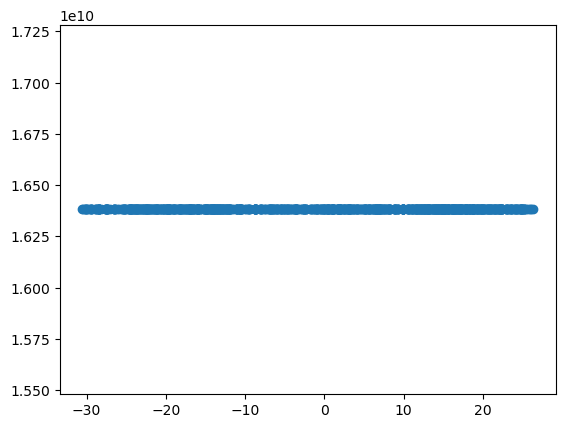

In [190]:
plt.scatter(X_tsne[:, 0], y_train["SalePrice"])
plt.show()

In [191]:
df.shape

(1460, 55)